# Perceptron

#### Importing packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from matplotlib import animation
% matplotlib nbagg

#### Reading CSV Files

In [24]:
data1 = pd.read_csv('datafile1.csv', names = ['X1', 'X2', 'Y'])
data2 = pd.read_csv('datafile2.csv', names = ['X1', 'X2', 'Y'])
data3 = pd.read_csv('datafile3.csv', names = ['X1', 'X2', 'Y'])
data4 = pd.read_csv('datafile4.csv', names = ['X1', 'X2', 'Y'])

## Dataset 1

In [25]:
data1.head()

,X1,X2,Y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0


#### Scatter Plot of X1 vs X2

<IPython.core.display.Javascript object>


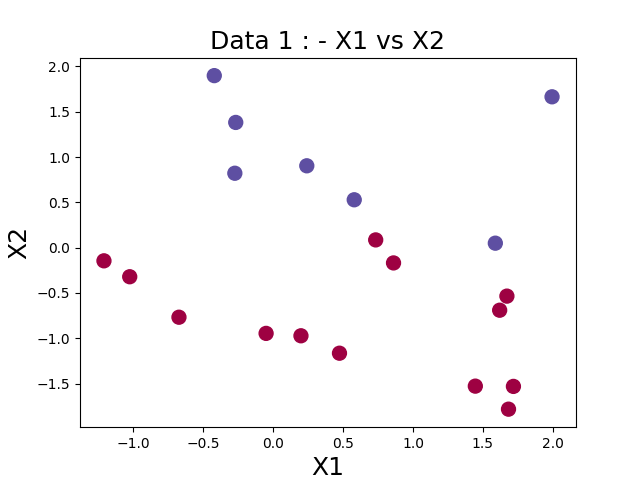

In [27]:
plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()

#### Setting inital values of weights(w1,w2) and bias(-threshold) using numpy random

In [28]:
w1 = np.random.random_sample()
w2 = np.random.random_sample()
threshold = np.random.random_sample()
bias = - threshold

print("INITIAL VALUES: W1 = ", w1, "| W2 = ", w1,"| Bias =" , bias)

INITIAL VALUES: W1 =  0.1119313269342852 | W2 =  0.1119313269342852 | Bias = -0.11655028250180155


#### Iterations for 20 Epocs

In [29]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:
    
    total_error = 0
    for row in data1.iterrows():
        X1 = row[1][0]
        X2 = row[1][1]
        Y_Actual = row[1][2]
 
        #   Predicting Values --
        ##   X1W1 + X2W2 -t >=0 OR <0;
        ##   X1W1 + X2W2 +bias >=0 OR <0;     bias = -threshold = -0.3(e.g.)
        Activation_value = X1 * w1 + X2 * w2 + bias
        
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        
        #   Updating Values --
        ##   Wi = Wi + Error(y - y^)*Xi*LearningRate
        error = Y_Actual - Y_Predicted 
        w1 = w1 + error*X1
        w2 = w2 + error*X2
        bias = bias + error
        total_error += error
        
    weights_plot.append(np.array([w1,w2,bias]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc, " Continous TE:0 =", count)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  0.0
Epoc:  2  -> Total Error =  -1.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  0.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  0.0
Epoc:  7  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = 0.917091958644 | W2 =  2.39324407832 | Bias =  -1.1165502825 ---> Found at EPOC: 7  Continous TE:0 = 5


#### Plots

<IPython.core.display.Javascript object>


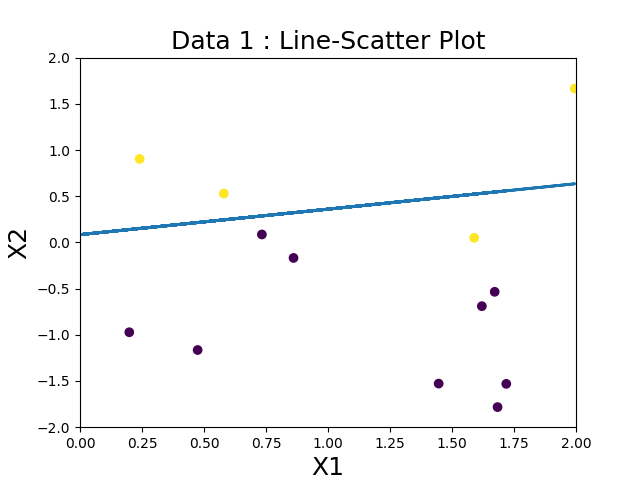

In [36]:
# ANIMATION - First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data1.X1, data1.X2, c = data1.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data1.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : Line-Scatter Plot', fontsize = 18)
plt.show()

In [37]:
# WITHOUT ANIMATION --

## Line Plotplt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()
# x = np.arange(-1.5, 3)
# y = -x*(w1/w2) - bias/w2
# ## fit with np.polyfit
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b, '--')

## Scatter Plot
# plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
# plt.xlabel('X1', fontsize = 18)
# plt.ylabel('X2', fontsize = 18)
# plt.title('Half Planes (Line Plot)', fontsize = 18)
# plt.show()

This Model is linearly Separable

.

## Dataset 2

<IPython.core.display.Javascript object>


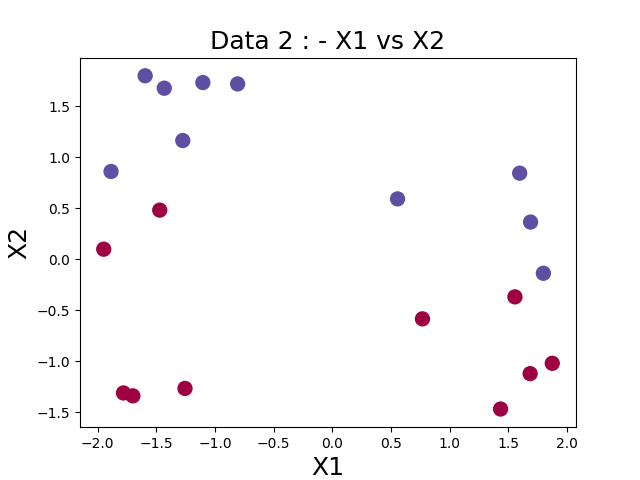

In [73]:
plt.scatter(data2.X1, data2.X2, c = data2.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : - X1 vs X2', fontsize = 18)
plt.show()

In [79]:
w1 = np.random.random_sample()
w2 = np.random.random_sample()
bias = -1 * np.random.random_sample()

print("INITIAL VALUES: W1 = ", w1, "| W2 = ", w1,"| Bias =" , bias)

INITIAL VALUES: W1 =  0.0657802219142326 | W2 =  0.0657802219142326 | Bias = -0.3990358571160977


In [80]:
count = 0
epoc = 1

while epoc <= 20:
    
    total_error = 0
    for row in data2.iterrows():
        X1 = row[1][0]
        X2 = row[1][1]
        Y_Actual = row[1][2]
        
        Activation_value = X1 * w1 + X2 * w2 + bias
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0

        error = Y_Actual - Y_Predicted         
        w1 = w1 + error*X1
        w2 = w2 + error*X2
        bias = bias + error
        total_error += error

    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc, " Continous TE:0 =", count)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  1.0
Epoc:  2  -> Total Error =  -1.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  0.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  0.0
Epoc:  7  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = 0.721761940092 | W2 =  2.64448127689 | Bias =  -0.399035857116 ---> Found at EPOC: 7  Continous TE:0 = 5


#### PLOT

<IPython.core.display.Javascript object>


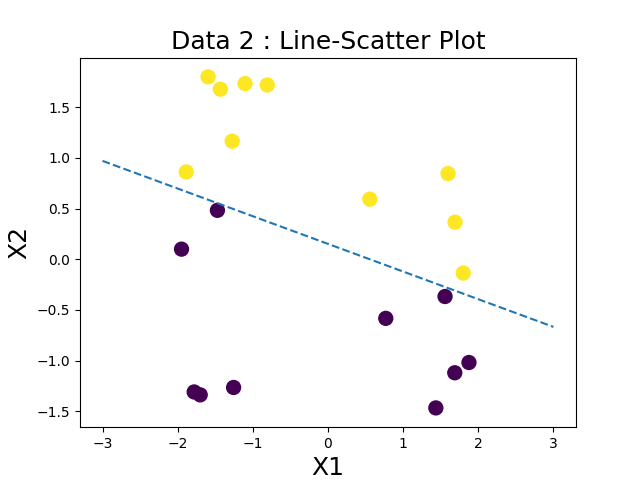

In [81]:
# Line Plot
x = np.arange(-3, 4)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')


# Scatter Plot
plt.scatter(data2.X1, data2.X2, c = data2.Y , s=100)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is linearly Separable

.

## Dataset 3

<IPython.core.display.Javascript object>


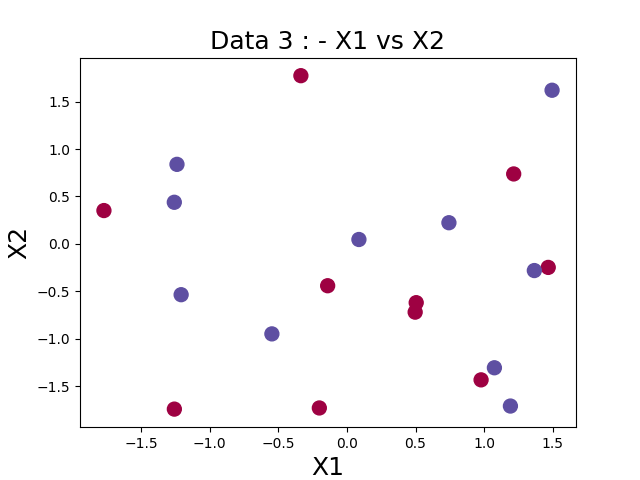

In [82]:
plt.scatter(data3.X1, data3.X2, c = data3.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 3 : - X1 vs X2', fontsize = 18)
plt.show()

In [14]:
w1 = np.random.random_sample()
w2 = np.random.random_sample()
bias = -1 * np.random.random_sample()

print("INITIAL VALUES: W1 = ", w1, "| W2 = ", w1,"| Bias =" , bias)

INITIAL VALUES: W1 =  0.9180473283904337 | W2 =  0.9180473283904337 | Bias = -0.03844213829506338


In [15]:
count = 0
epoc = 1

while epoc <= 20:
    
    total_error = 0
    for row in data3.iterrows():
        X1 = row[1][0]
        X2 = row[1][1]
        Y_Actual = row[1][2]
        
        Activation_value = X1 * w1 + X2 * w2 + bias
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0

        error = Y_Actual - Y_Predicted         
        w1 = w1 + error*X1
        w2 = w2 + error*X2
        bias = bias + error
        total_error += error

    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc, " Continous TE:0 =", count)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  -1.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  1.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  -1.0
Epoc:  7  -> Total Error =  0.0
Epoc:  8  -> Total Error =  1.0
Epoc:  9  -> Total Error =  -1.0
Epoc:  10  -> Total Error =  0.0
Epoc:  11  -> Total Error =  1.0
Epoc:  12  -> Total Error =  -1.0
Epoc:  13  -> Total Error =  1.0
Epoc:  14  -> Total Error =  0.0
Epoc:  15  -> Total Error =  -1.0
Epoc:  16  -> Total Error =  0.0
Epoc:  17  -> Total Error =  0.0
Epoc:  18  -> Total Error =  0.0
Epoc:  19  -> Total Error =  1.0
Epoc:  20  -> Total Error =  -1.0

This model is not linearly separable!


<IPython.core.display.Javascript object>


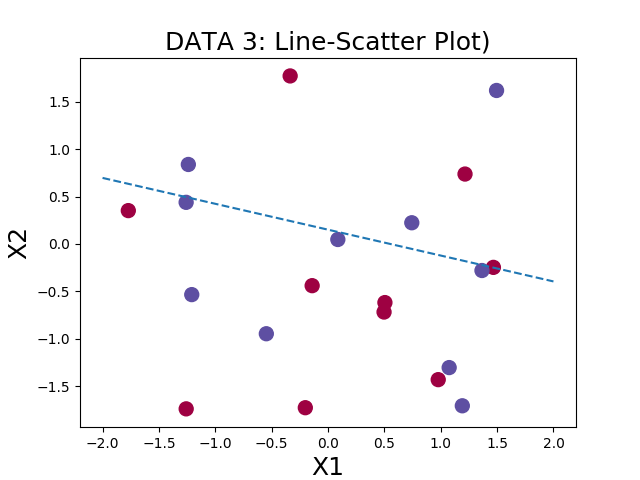

In [86]:
# Line Plot
x = np.arange(-2, 3)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')


# Scatter Plot
plt.scatter(data3.X1, data3.X2, c = data3.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('DATA 3: Line-Scatter Plot)', fontsize = 18)
plt.show()

This Model is NOT linearly Separable

.

## Dataset 4

<IPython.core.display.Javascript object>


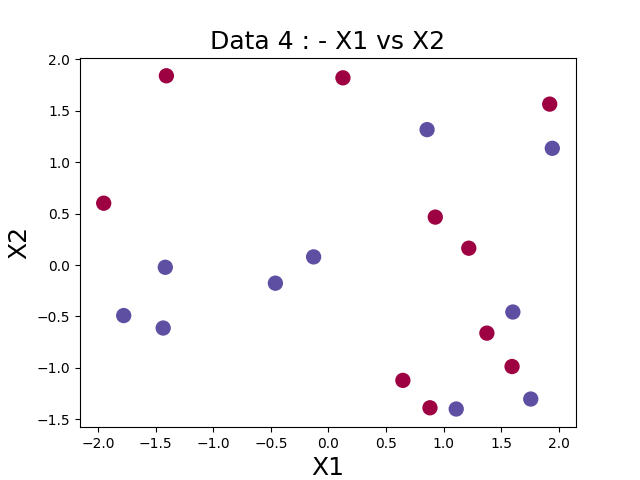

In [84]:
plt.scatter(data4.X1, data4.X2, c = data4.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 4 : - X1 vs X2', fontsize = 18)
plt.show()

In [18]:
w1 = np.random.random_sample()
w2 = np.random.random_sample()
bias = -1 * np.random.random_sample()

print("INITIAL VALUES: W1 = ", w1, "| W2 = ", w1,"| Bias =" , bias)

INITIAL VALUES: W1 =  0.6504132555284167 | W2 =  0.6504132555284167 | Bias = -0.5246645547184187


In [19]:
count = 0
epoc = 1

while epoc <= 20:
    
    total_error = 0
    for row in data4.iterrows():
        X1 = row[1][0]
        X2 = row[1][1]
        Y_Actual = row[1][2]        
        Activation_value = X1 * w1 + X2 * w2 + bias
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        error = Y_Actual - Y_Predicted         
        w1 = w1 + error*X1
        w2 = w2 + error*X2
        bias = bias + error
        total_error += error

    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc, " Continous TE:0 =", count)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  0.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  -1.0
Epoc:  5  -> Total Error =  1.0
Epoc:  6  -> Total Error =  0.0
Epoc:  7  -> Total Error =  0.0
Epoc:  8  -> Total Error =  0.0
Epoc:  9  -> Total Error =  0.0
Epoc:  10  -> Total Error =  -1.0
Epoc:  11  -> Total Error =  2.0
Epoc:  12  -> Total Error =  -1.0
Epoc:  13  -> Total Error =  0.0
Epoc:  14  -> Total Error =  0.0
Epoc:  15  -> Total Error =  -1.0
Epoc:  16  -> Total Error =  2.0
Epoc:  17  -> Total Error =  -1.0
Epoc:  18  -> Total Error =  0.0
Epoc:  19  -> Total Error =  -1.0
Epoc:  20  -> Total Error =  1.0

This model is not linearly separable!


<IPython.core.display.Javascript object>


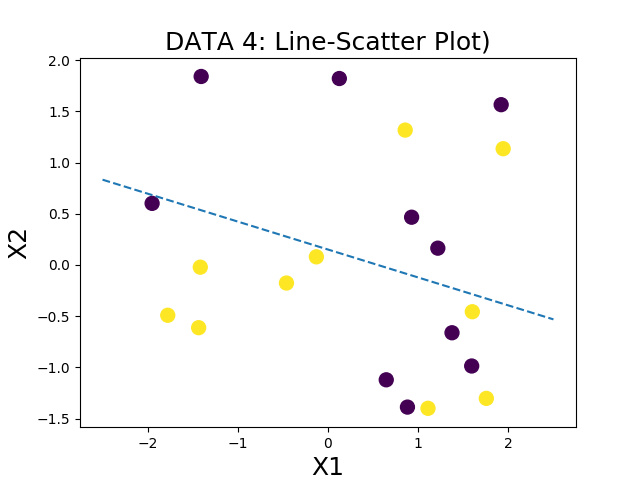

In [87]:
# Line Plot
x = np.arange(-2.5, 3)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')


# Scatter Plot
plt.scatter(data4.X1, data4.X2, c = data4.Y , s=100)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('DATA 4: Line-Scatter Plot)', fontsize = 18)
plt.show()

This model is NOT linearly separable